In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [16]:
# DataFrame 1: Jobs
df_jobs = pd.DataFrame({
    'job_title': [
        'Data Scientist', 
        'Machine Learning Engineer', 
        'Data Analyst', 
        'Business Intelligence Analyst', 
        'AI Researcher'
    ],
    'company_name': [
        'TechNova Inc', 
        'Quantum AI', 
        'InnoData', 
        'BizMetrics', 
        'NeuronWorks'
    ],
    'location': [
        'New York, NY', 
        'San Francisco, CA', 
        'Austin, TX', 
        'Chicago, IL', 
        'Boston, MA'
    ]
})

# DataFrame 2: Companies
df_companies = pd.DataFrame({
    'name': [
        'TechNova Inc', 
        'Quantum AI', 
        'InnoData', 
        'BizMetrics', 
        'NeuronWorks'
    ],
    'industry': [
        'Technology', 
        'Artificial Intelligence', 
        'Data Services', 
        'Analytics', 
        'Research & Development'
    ],
    'company_size': [
        '201-500', 
        '51-200', 
        '501-1000', 
        '1001-5000', 
        '11-50'
    ]
})

In [17]:
df_jobs

,job_title,company_name,location
0,Data Scientist,TechNova Inc,"New York, NY"
1,Machine Learning Engineer,Quantum AI,"San Francisco, CA"
2,Data Analyst,InnoData,"Austin, TX"
3,Business Intelligence Analyst,BizMetrics,"Chicago, IL"
4,AI Researcher,NeuronWorks,"Boston, MA"


In [18]:
df_companies

,name,industry,company_size
0,TechNova Inc,Technology,201-500
1,Quantum AI,Artificial Intelligence,51-200
2,InnoData,Data Services,501-1000
3,BizMetrics,Analytics,1001-5000
4,NeuronWorks,Research & Development,11-50


In [20]:
df_jobs.merge(df_companies,on=df_companies.name)

,key_0,job_title,company_name,location,name,industry,company_size
0,TechNova Inc,Data Scientist,TechNova Inc,"New York, NY",TechNova Inc,Technology,201-500
1,Quantum AI,Machine Learning Engineer,Quantum AI,"San Francisco, CA",Quantum AI,Artificial Intelligence,51-200
2,InnoData,Data Analyst,InnoData,"Austin, TX",InnoData,Data Services,501-1000
3,BizMetrics,Business Intelligence Analyst,BizMetrics,"Chicago, IL",BizMetrics,Analytics,1001-5000
4,NeuronWorks,AI Researcher,NeuronWorks,"Boston, MA",NeuronWorks,Research & Development,11-50


In [21]:
df_usa = df[df['job_country']=='United States']

In [25]:
df_usa['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')
df_usa

C:\Users\prath\AppData\Local\Temp\ipykernel_3012\2024147993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN,January


In [27]:
df_usa_pivot = df.pivot_table(index=df_usa.job_posted_month,columns='job_title_short',aggfunc='size')

In [28]:
df_usa_pivot.head()

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114


In [35]:
df_usa_pivot['month no'] = pd.to_datetime(df_usa_pivot.index,format='%B').month

In [36]:
df_usa_pivot.head()

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month no
job_posted_month,,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112,4
August,903,39,6634,3269,6318,68,1186,903,1515,194,8
December,648,40,3979,2641,3472,119,601,689,752,212,12
February,447,24,6124,3060,4956,56,1258,878,1127,90,2
January,527,36,8494,2655,6915,60,1544,773,1552,114,1


In [37]:
df_usa_pivot.sort_values('month no',inplace=True)

In [53]:
df_usa_pivot.drop(columns='month no',inplace=True)

In [54]:
df_usa_software_pivot=pd.read_csv('https://lukeb.co/software_csv').set_index('job_posted_month')

In [56]:
df_usa_merged=df_usa_pivot.merge(df_usa_software_pivot,on='job_posted_month')

In [66]:
top_5 = (df_usa_merged
         .sum()
         .sort_values(ascending=False)
         .head()
         .index
         .to_list())
top_5 

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

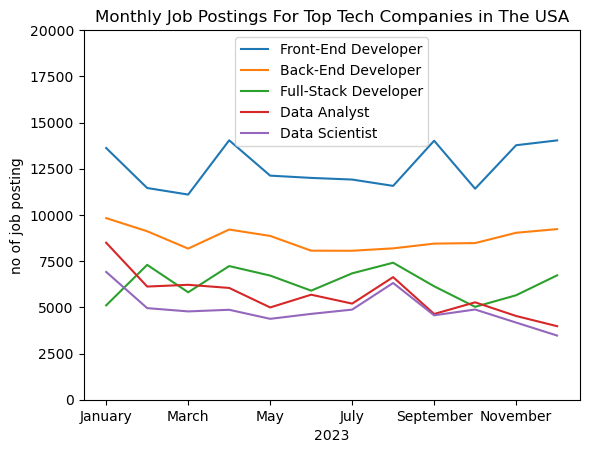

In [68]:
df_usa_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings For Top Tech Companies in The USA')
plt.xlabel('2023')
plt.ylabel('no of job posting')
plt.legend()
plt.ylim(0,20000)
plt.show()